In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [2]:
path = "./data/Mall_Customers.csv"

df = pd.read_csv(path)

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.dtypes.value_counts()

int64     4
object    1
Name: count, dtype: int64

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
missing_values = df.isnull().sum()
missing_values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.groupby("Gender").mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [7]:
df.Gender.value_counts()


Gender
Female    112
Male       88
Name: count, dtype: int64

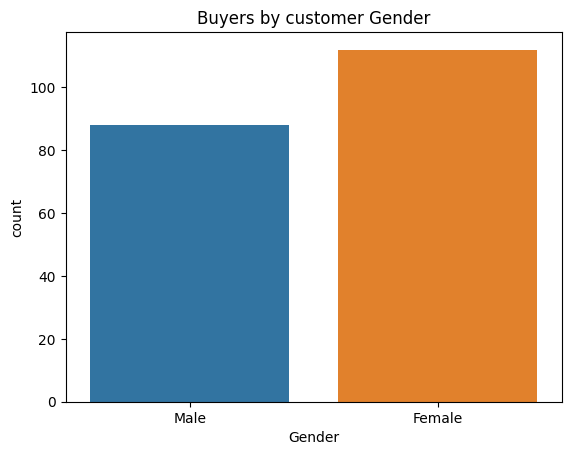

In [8]:
sns.countplot(x='Gender', data=df, hue='Gender')
plt.title("Buyers by customer Gender")
plt.show()



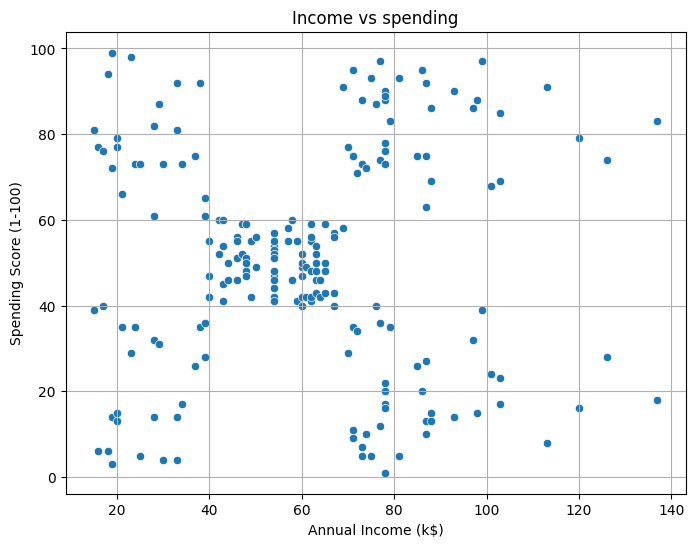

In [9]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Income vs spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

The graph shows that most customers have an annual income in the range of $40 to $70 thousand, and it is this group that shows the highest density on the chart. In other income groups (below 40 thousand and above 70 thousand), customers are clearly divided into two categories: some spend a lot (high Spending Score), others spend almost nothing. This may indicate the presence of other factors that influence consumer behavior, such as age, gender, lifestyle, or the type of goods they are interested in. Therefore, for deeper segmentation, it is worth analyzing other variables to identify potential customer clusters and identify opportunities for personalized marketing campaigns.

In [10]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.67144992, -1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-1.6541292 , -0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.63680847, -1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-1.61948775, -0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.60216702, -1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [-1.5848463 ,  1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-1.56752558, -0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [-1.55020485,  2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-1.53288413, -0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [-1.5155634 ,  1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.49824268, -1.06573534, -1.5

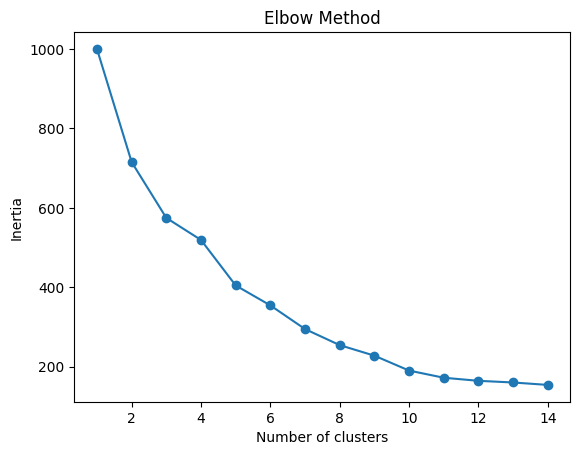

In [12]:
from sklearn.cluster import KMeans
distortions = []
for i in range(1, 15):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X_scaled)
    distortions.append(km.inertia_)

plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [14]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster
0,1,19,15,39,True,2
1,2,21,15,81,True,2
2,3,20,16,6,False,2
3,4,23,16,77,False,2
4,5,31,17,40,False,2
...,...,...,...,...,...,...
195,196,35,120,79,False,1
196,197,45,126,28,False,4
197,198,32,126,74,True,3
198,199,32,137,18,True,4


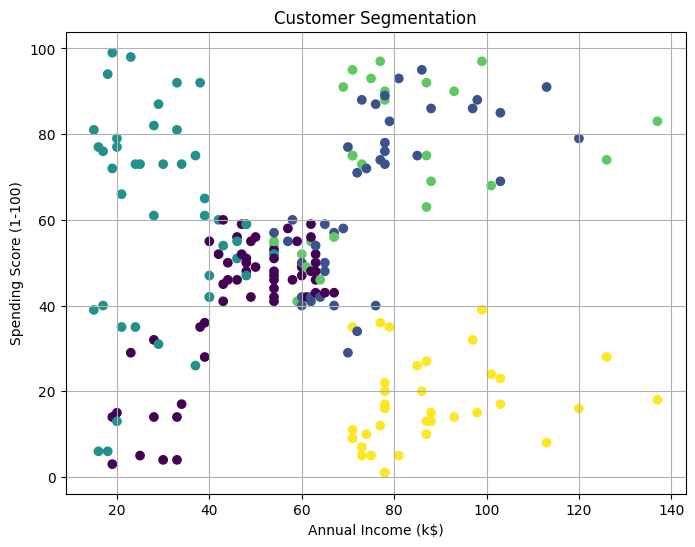

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=df["Cluster"], cmap="viridis")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation")
plt.grid(True)
plt.show()

In [25]:
df['Cluster'] = kmeans.labels_

cluster_profile = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender_Male': lambda x: x.value_counts().index[0]
}).round(1)

print(cluster_profile)

          Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
Cluster                                                               
0        55.5                47.4                    41.4        False
1        31.1                75.6                    65.3        False
2        27.1                30.2                    60.6        False
3        30.7                78.8                    72.9         True
4        41.7                88.2                    17.3         True


Based on the research, we can conclude that the main goal for the shopping center is to attract men over 40. These are the yellow circles on the graph. Their income is high, but their spending is low. This means the need to create special offers for them